<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/ADS1_Solutions_Unit01_Tutorial_2_Reading_Files_and_Categorical_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science 1 : Unit2
### Lecturer: **Wong** Kim Siong
## 1)Reading Files
There are many ways of reading files in python and many different types of file types you may be familiar with.
We will focus in this module on csv (comma separated values) files, as this is one of the most commonly used file types across many fields. Data Handling and Visualisation will present further, more awkward data types.
The first thing to do is to make sure your path to the file is always correct.
The easiest way of doing this, especially for small data files, is to ensure the file is in the same directory as your python script.
Let's look at some different methods of reading a simple csv.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
# Manually (inbuilt python methods)
with open('countries_top10.csv', 'r') as f: #read file and closed file after reading
    data = [] #create an empty list to store data from file
    for line in f.readlines(): # a loop to keep reading the file line by line
        linelist = line.rstrip('\n').split(',')#remove the newline (\n) character at the end of each line, split the lines by comma and turn it into a string values. "SIN,123\n" -> ["SIN","123"]
        for i, value in enumerate(linelist): #Loop through each element in the row of linelist with index 1 and value
            try:
                value = float(value) #trie to convert value into a number
                if value.is_integer():
                    value = int(value)
            except ValueError: # if value is not a number (integer or float) pass
                continue
            linelist[i] = value # Replace original string in linelist with converted number (if conversion take place)
        data.append(linelist) # build on the linelist
print(data) #print the final data list into the data list
print(type(data))
print(type(data[0]))
print(type(data[1][1]))

[['Country', 'Population', 'Area', 'GDP'], ['Bangladesh', 160996000, 147570, 195100000000], ['Brasil', 207848000, 8547404, 1775000000000], ['China', 1379113000, 9572419, 10866000000000], ['India', 1311051000, 3287263, 2047000000000], ['Indonesia', 257564000, 1912988, 861900000000], ['Mexico', 127017000, 1359162, 1144000000000], ['Nigeria', 182202000, 923768, 481100000000], ['Pakistan', 188925000, 796095, 270000000000], ['Russia', 144097000, 17075400, 1326000000000], ['USA', 321419000, 9809155, 17947000000000]]
<class 'list'>
<class 'list'>
<class 'int'>


In [8]:
# CSV method (standard library)
# you need to import csv library into python at the beginning
import csv
with open('countries_top10.csv', 'r') as f: #open the file in read mode. Assign f as file object name. with block ensures it "closes" and move forward
    csvreader = csv.reader(f) # in built command to read the file and automatically splits each row by commas (no need to manually spilt) like above method
    data = []
    for row in csvreader: # same thing as above manual method
        for i, value in enumerate(row):
            try:
                value = float(value)
                if value.is_integer():
                    value = int(value)
            except ValueError:
                continue
            row[i] = value
        data.append(row)
print(data)
print(type(data))
print(type(data[0]))
print(type(data[1][1]))

[['Country', 'Population', 'Area', 'GDP'], ['Bangladesh', 160996000, 147570, 195100000000], ['Brasil', 207848000, 8547404, 1775000000000], ['China', 1379113000, 9572419, 10866000000000], ['India', 1311051000, 3287263, 2047000000000], ['Indonesia', 257564000, 1912988, 861900000000], ['Mexico', 127017000, 1359162, 1144000000000], ['Nigeria', 182202000, 923768, 481100000000], ['Pakistan', 188925000, 796095, 270000000000], ['Russia', 144097000, 17075400, 1326000000000], ['USA', 321419000, 9809155, 17947000000000]]
<class 'list'>
<class 'list'>
<class 'int'>


In [9]:
# numpy method(s)
data = np.genfromtxt('countries_top10.csv', dtype=[('Country', 'S10'), ('Population', int), ('Area', int), ('GDP', int)],
                     delimiter=',', skip_header=1)
# or data = np.loadtxt -- if you know there is no missing data
print(data)
print(type(data))
print(type(data[0]))
print(type(data[1][1]))

[(b'Bangladesh',  160996000,   147570,   195100000000)
 (b'Brasil',  207848000,  8547404,  1775000000000)
 (b'China', 1379113000,  9572419, 10866000000000)
 (b'India', 1311051000,  3287263,  2047000000000)
 (b'Indonesia',  257564000,  1912988,   861900000000)
 (b'Mexico',  127017000,  1359162,  1144000000000)
 (b'Nigeria',  182202000,   923768,   481100000000)
 (b'Pakistan',  188925000,   796095,   270000000000)
 (b'Russia',  144097000, 17075400,  1326000000000)
 (b'USA',  321419000,  9809155, 17947000000000)]
<class 'numpy.ndarray'>
<class 'numpy.void'>
<class 'numpy.int64'>


In [10]:
# pandas
df = pd.read_csv('countries_top10.csv')
print(df)
print(type(df))
print(type(df.iloc[0]))
print(type(df.iloc[1, 1]))
# or preferably
print(df['Population'][1])

      Country  Population      Area             GDP
0  Bangladesh   160996000    147570    195100000000
1      Brasil   207848000   8547404   1775000000000
2       China  1379113000   9572419  10866000000000
3       India  1311051000   3287263   2047000000000
4   Indonesia   257564000   1912988    861900000000
5      Mexico   127017000   1359162   1144000000000
6     Nigeria   182202000    923768    481100000000
7    Pakistan   188925000    796095    270000000000
8      Russia   144097000  17075400   1326000000000
9         USA   321419000   9809155  17947000000000
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
207848000


So let's use the pandas method.
What about making more data?
Let's also reindex so the country is the index.

In [11]:
df = pd.read_csv('countries_top10.csv', index_col='Country')
df['GDP/head'] = df['GDP'] / df['Population']
df['Pop/km2'] = df['Population'] / df['Area']
df.head()

,Population,Area,GDP,GDP/head,Pop/km2
Country,,,,,
Bangladesh,160996000,147570,195100000000,1211.831350,1090.980552
Brasil,207848000,8547404,1775000000000,8539.894538,24.317091
China,1379113000,9572419,10866000000000,7878.977285,144.071525
India,1311051000,3287263,2047000000000,1561.342770,398.827535
Indonesia,257564000,1912988,861900000000,3346.352751,134.639632


Note the use of df.head.
One caution is when in a jupyter notebook, be aware if you're modifying code and have already modified the dataframe, certain commands when re-run may break, e.g. if I had used set_index instead.

# Question 1
## Part 1
Load the file, GDP_2015dollars.csv, set the year as the index and plot the time series of the 4 countries GDP change, with a log scale (plt.yscale('log')).
Note after setting the year as the index, you can access that data as df_gdp.index.
Another hint, you can use a for loop across df_gdp.columns to save repeating similar lines of code.

In [13]:
df_gdp = pd.read_csv('GDP_2015dollars.csv', index_col='Year')
df_gdp.head()

,China,Germany,Japan,United States
Year,,,,
1970,2.320617e+11,1.398222e+12,1.460289e+12,5.183548e+12
1971,2.484453e+11,1.442024e+12,1.528908e+12,5.354261e+12
1972,2.579111e+11,1.504036e+12,1.657543e+12,5.635836e+12
1973,2.779250e+11,1.575891e+12,1.790687e+12,5.954020e+12
1974,2.843450e+11,1.589918e+12,1.768747e+12,5.921835e+12


In [14]:
def plot_yearly_gdp(df_gdp):
    """
    Plots the time series data for 4 countries GDP on a log scale
    """
    plt.figure(dpi=144)

    countries = df_gdp.columns
    for country in countries:
        plt.plot(df_gdp.index, df_gdp[country], label=country)

    plt.legend()
    plt.yscale('log')
    plt.xlabel('Year')
    plt.ylabel('GDP (US $)')
    plt.show()
    return

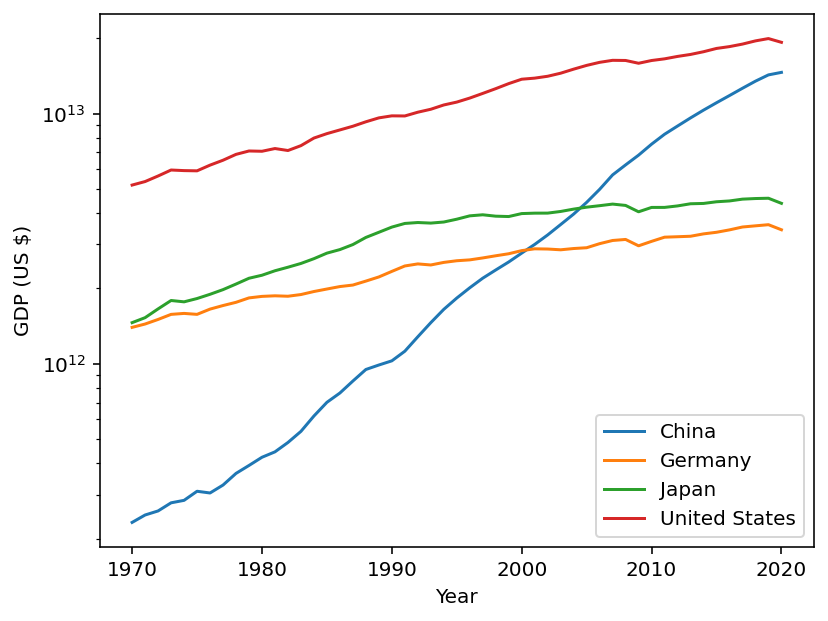

In [15]:
plot_yearly_gdp(df_gdp)

## Part 2
Do the same as above but scale each GDP relative to the United States, as a percentage. This will be on a linear scale.

In [16]:
df_gdp = pd.read_csv('GDP_2015dollars.csv', index_col='Year')

for country in df_gdp.columns:
    df_gdp[country + '_rel'] = 100 * df_gdp[country] / df_gdp['United States']

df_gdp.head()

,China,Germany,Japan,United States,China_rel,Germany_rel,Japan_rel,United States_rel
Year,,,,,,,,
1970,2.320617e+11,1.398222e+12,1.460289e+12,5.183548e+12,4.476890,26.974226,28.171605,100.0
1971,2.484453e+11,1.442024e+12,1.528908e+12,5.354261e+12,4.640142,26.932273,28.554971,100.0
1972,2.579111e+11,1.504036e+12,1.657543e+12,5.635836e+12,4.576270,26.687008,29.410772,100.0
1973,2.779250e+11,1.575891e+12,1.790687e+12,5.954020e+12,4.667854,26.467684,30.075256,100.0
1974,2.843450e+11,1.589918e+12,1.768747e+12,5.921835e+12,4.801637,26.848394,29.868215,100.0


In [17]:
def plot_yearly_gdp_relative(df_gdp):
    """
    Plots the time series data for 3 countries GDP relative to the US, on a linear scale
    """
    plt.figure(dpi=144)

    countries = df_gdp.columns
    for country in countries:
        if 'rel' not in country or 'United States' in country:
            continue
        plt.plot(df_gdp.index, df_gdp[country], label=country.strip('_rel'))

    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Relative GDP (% US $)')
    plt.show()
    return

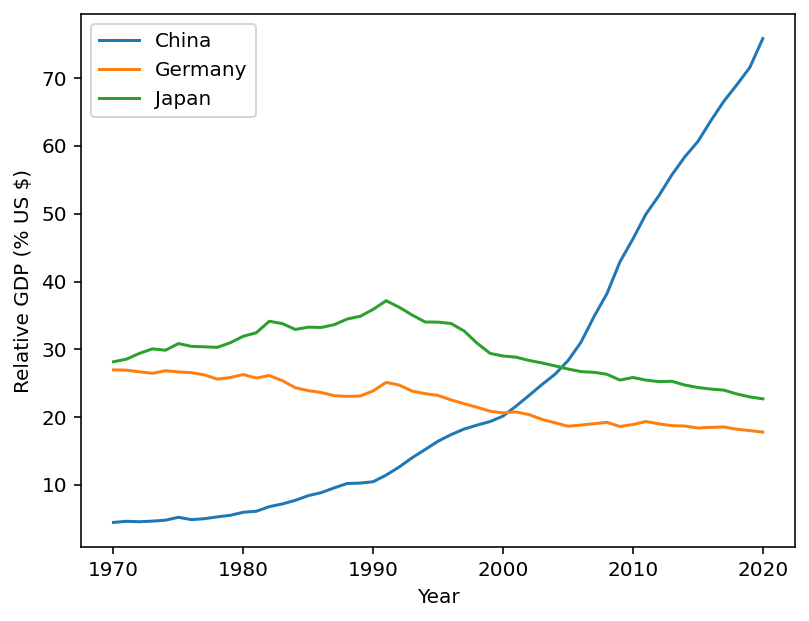

In [18]:
plot_yearly_gdp_relative(df_gdp)

## End Question 1
Let's now look at some categorical data, continuing to work with pandas dataframes.
# 2) Categorical Data

In [19]:
sample1 = np.random.normal(-1.0, 1.0, 10000)
sample2 = np.random.normal(1.0, 0.5, 10000)
sample3 = np.random.normal(0.0, 1.5, 10000)
sample4 = np.random.normal(-0.2, 2.0, 10000)

In [20]:
def plot_subplotted_histograms(sample1, sample2, sample3, sample4):
    """
    Plots 4 histograms as subplots
    """
    fig, axs = plt.subplots(2, 2, dpi=144)
    axs = axs.flatten()

    axs[0].hist(sample1)
    axs[1].hist(sample2)
    axs[2].hist(sample3)
    axs[3].hist(sample4)

    for i, ax in enumerate(axs):
        ax.set_ylabel('N')
        ax.set_title('Sample ' + str(i + 1))

    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()
    return

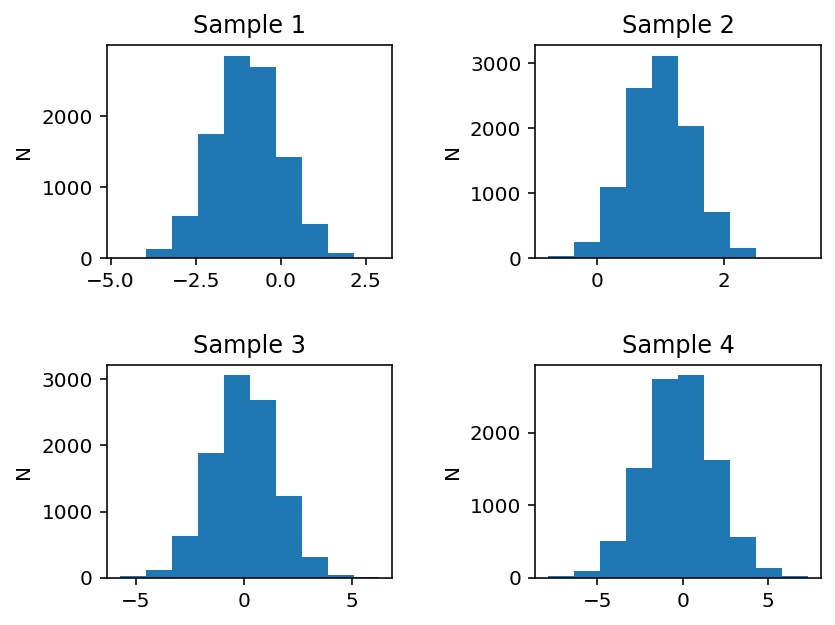

In [21]:
plot_subplotted_histograms(sample1, sample2, sample3, sample4)

In [22]:
def plot_overplotted_histograms(*samples):
    """
    Plots 4 histograms on top of each other
    """
    plt.figure(dpi=144)

    for i, sample in enumerate(samples):
        plt.hist(sample, label='Sample ' + str(i + 1), range=(-5, 5), bins=10, alpha=0.5)

    plt.ylabel('N')
    plt.xlim(-5, 5)
    plt.legend()
    plt.show()
    return

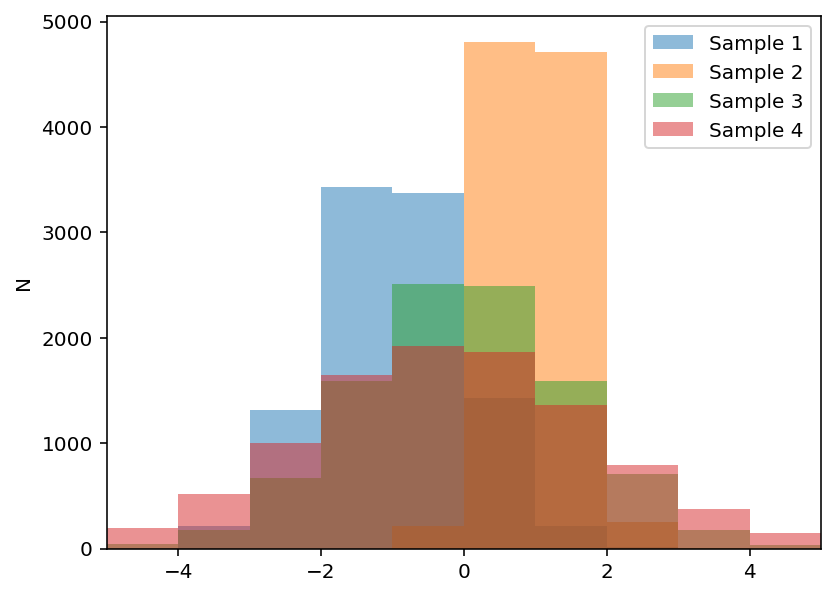

In [23]:
plot_overplotted_histograms(sample1, sample2, sample3, sample4)

Experiment with other histogram keywords in addition to the ones above, like density and cumulative.
A histogram is just a special form of bar chart, where the values are on the x axis and a count in on the y axis.
Feel free to further experiment with bar chart examples given [online](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).
# Question 2
Perform the same example histograms as above, so a subplots and overplotted (as a cumulative density) version, with the financial annual returns provided.

In [24]:
df_tesco = pd.read_csv('TSCO_ann.csv', index_col='year')
df_bp = pd.read_csv('BP_ann.csv', index_col='year')
df_barclays = pd.read_csv('BCS_ann.csv', index_col='year')
df_vodaphone = pd.read_csv('VOD_ann.csv', index_col='year')
print(df_tesco.head())
print(df_bp.head())
print(df_barclays.head())
print(df_vodaphone.head())

          price  ann_return
year                       
1989  24.494144   22.941372
1990  30.810261   17.814613
1991  36.818260    5.895034
1992  39.053959    5.149691
1993  41.117802  -12.174125
          price  ann_return
year                       
1989  41.180229   19.174906
1990  49.884350  -11.157063
1991  44.617970   -6.082900
1992  41.984802  -15.618524
1993  35.913830   46.029975
         price  ann_return
year                      
1987  1.515162    4.754541
1988  1.587201   -0.986012
1989  1.571551   25.596115
1990  1.973807   12.323343
1991  2.217046   -0.793578
         price  ann_return
year                      
1989  4.003933   33.478386
1990  5.596050  -21.962895
1991  4.492602   17.645562
1992  5.359591   10.330250
1993  5.942858   48.265578


In [25]:
def plot_subplotted_annual_returns(*dfs, labels=('Tesco', 'BP', 'Barclays', 'Vodaphone')):
    """
    Plots 4 histograms as subplots
    """
    fig, axs = plt.subplots(2, 2, dpi=144)
    axs = axs.flatten()

    for i, ax in enumerate(axs):
        ax.hist(dfs[i]['ann_return'])
        ax.set_ylabel('N')
        ax.set_title(labels[i])

    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()
    return

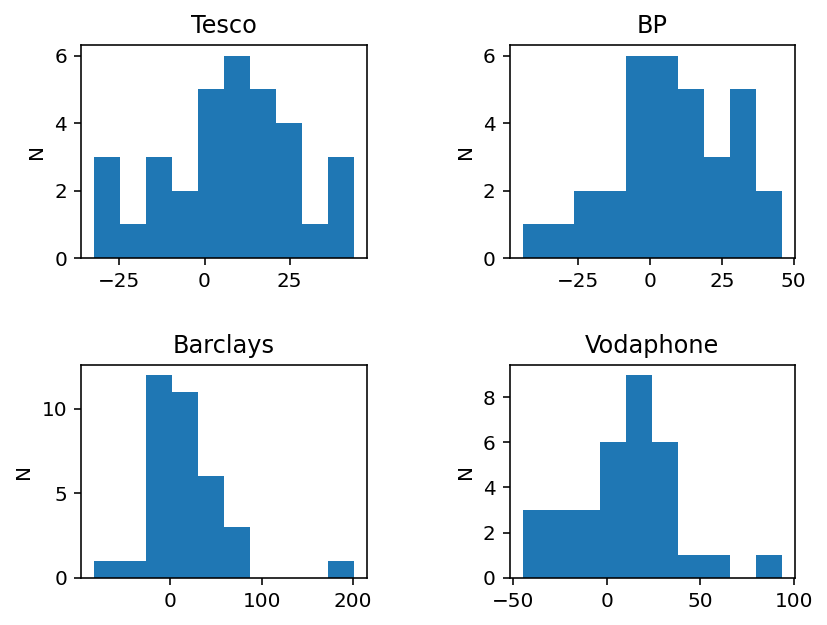

In [26]:
plot_subplotted_annual_returns(df_tesco, df_bp, df_barclays, df_vodaphone)

In [27]:
def plot_overplotted_annual_returns(*dfs, labels=('Tesco', 'BP', 'Barclays', 'Vodaphone')):
    """
    Plots 4 histograms on top of each other
    """
    plt.figure(dpi=144)

    for i, df in enumerate(dfs):
        plt.hist(df['ann_return'], label=labels[i], range=(-50, 100), bins=150, alpha=0.75,
                 density=True, cumulative=True)

    plt.ylabel('N')
    plt.ylim(0, 1)
    plt.xlim(-50, 100)
    plt.legend()
    plt.show()
    return

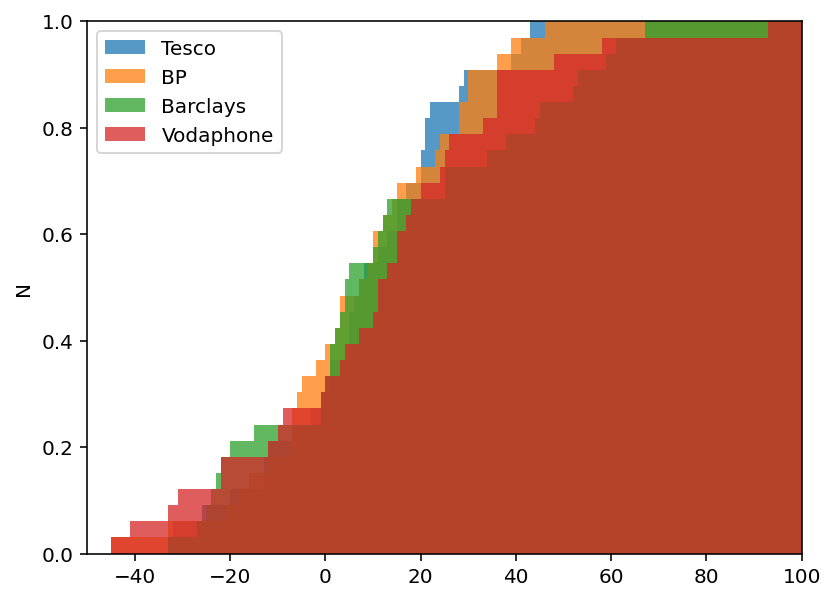

In [28]:
plot_overplotted_annual_returns(df_tesco, df_bp, df_barclays, df_vodaphone)

## End Question 2
Let's finish with some pie charts.
For example, the largest countries in the EU, by GDP.

In [29]:
gdp = np.array([3132.670e9, 2225.260e9, 1672.438e9, 1113.851e9])
countries = ["Germany", "France", "Italy", "Spain"]

In [30]:
def plot_gdp_pie(gdp, labels=countries):
    """
    Creates a pie chart of the GDPs of the 4 largest countries, by GDP
    """
    plt.figure(dpi=144)

    plt.pie(gdp, labels=labels, autopct='%1.1f%%')
    plt.title('Largest Economies in the EU')
    plt.axis('Equal')
    plt.show()
    return

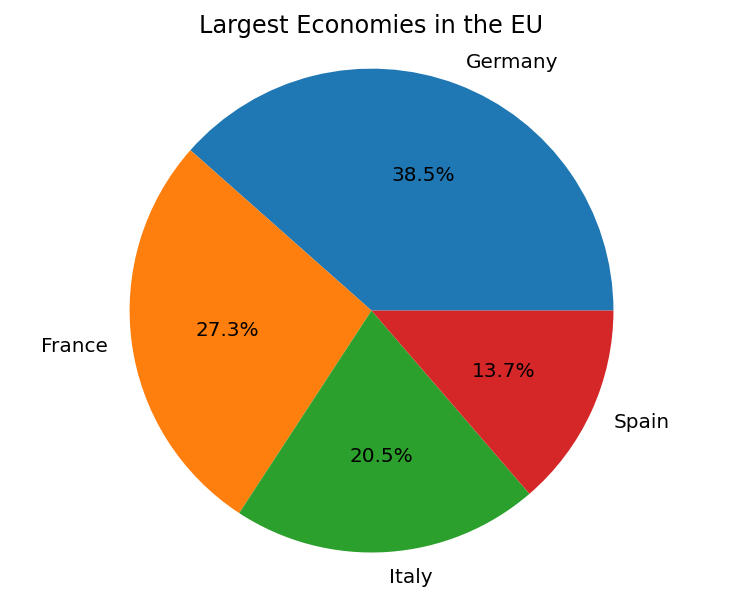

In [31]:
plot_gdp_pie(gdp)
# but this isn't all of the economies in the EU!

In [32]:
gdp = np.array([3132.670e9, 2225.260e9, 1672.438e9, 1113.851e9])
countries = ["Germany", "France", "Italy", "Spain"]

gdp_EU = 12451.987e9
gdp /= gdp_EU

In [33]:
def plot_gdp_pie_unnormalised(gdp, labels=countries):
    """
    Creates a pie chart of the GDPs of the 4 largest countries, by GDP
    """
    plt.figure(dpi=144)

    plt.pie(gdp, labels=labels, autopct='%1.1f%%', normalize=False)
    plt.title('Largest Economies in the EU')
    plt.axis('Equal')
    plt.show()
    return

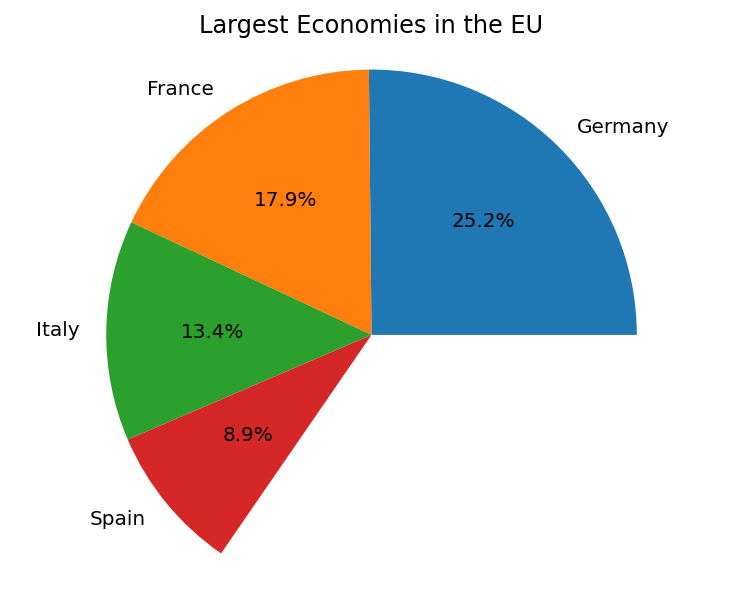

In [34]:
plot_gdp_pie_unnormalised(gdp)

# Question 3
Create these same style of pie charts, using the known market caps of the previously used companies, and relate it to the entire FTSE cap.
<ul>
    <li>Tesco: 20,979</li>
    <li>BP: 68,785</li>
    <li>Barclays: 33,367</li>
    <li>Vodaphone: 29,741</li>
    <li>FTSE: 1,814,000</li>
</ul>

In [35]:
cap = np.array([20979, 68785, 33367, 29741])
ftse = 1_814_000
norm_cap = cap / ftse

In [36]:
def plot_market_cap_pie(cap, labels=('Tesco', 'BP', 'Barclays', 'Vodaphone')):
    """
    Creates a pie chart of the market cap of 4 major companies
    """
    plt.figure(dpi=144)

    plt.pie(cap, labels=labels, autopct='%1.1f%%')
    plt.title('Market Cap of 4 Companies')
    plt.axis('Equal')
    plt.show()
    return

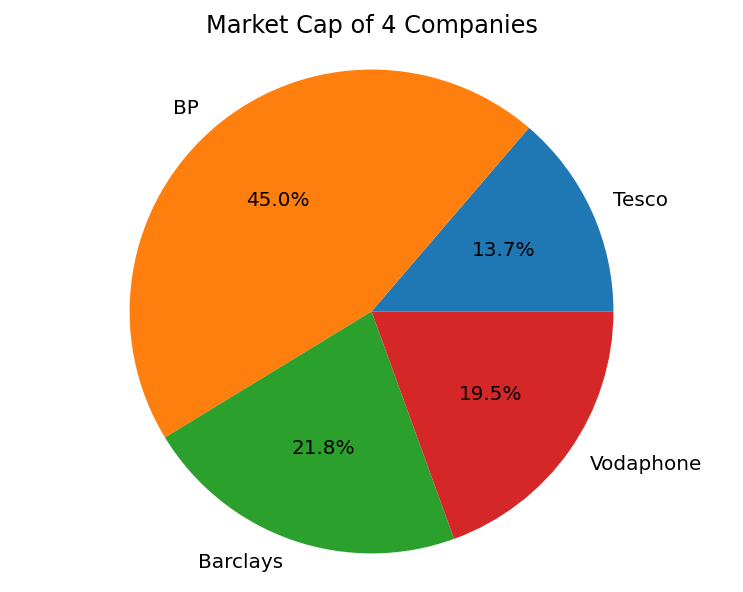

In [37]:
plot_market_cap_pie(cap)

In [38]:
def plot_market_cap_pie_unnormalised(norm_cap, labels=('Tesco', 'BP', 'Barclays', 'Vodaphone')):
    """
    Creates a pie chart of the market cap of 4 major companies,  normalised to the FTSE
    """
    plt.figure(dpi=144)

    plt.pie(norm_cap, labels=labels, autopct='%1.1f%%', normalize=False)
    plt.title('Total Market Cap of 4 Companies')
    plt.axis('Equal')
    plt.show()
    return

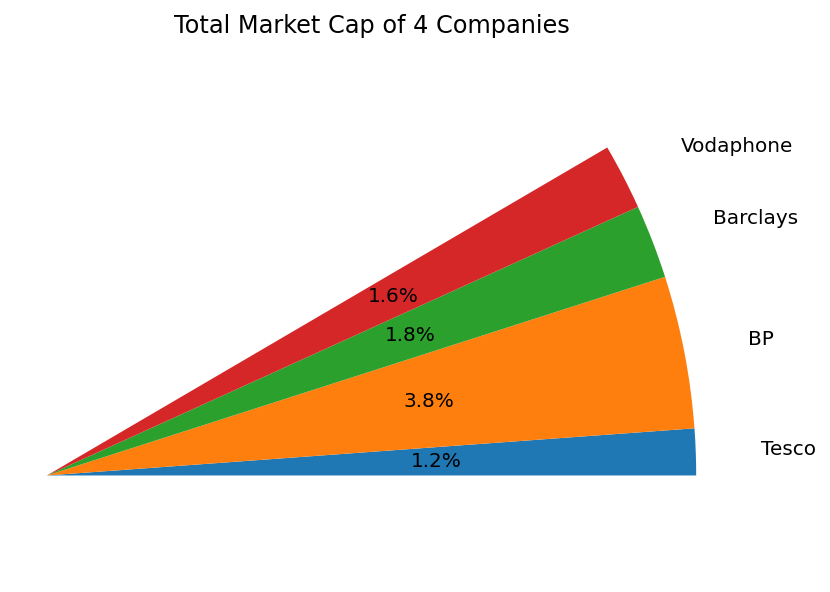

In [39]:
plot_market_cap_pie_unnormalised(norm_cap)

## End Question 3